MINI PROJECT LOAN PREDICTION USING MACHINE LEARNING

IMPORTING NECESSAARY LIBRARIES

In [15]:
import pandas as pd   # used to load dataset to pandas dataframe
import numpy as np    # used to create an array
import seaborn as sb        # used for advanced statistical plots which we have used in EDA section
import pickle          # used to covert our model into bite stream
import matplotlib.pyplot as mtp   # used to plot low level graph

In [16]:
from sklearn.model_selection import train_test_split      # split to train and test subsets
from sklearn.metrics import classification_report,confusion_matrix  # used for result analysis

from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

UPLOADING DATASET

In [17]:
dataset= pd.read_csv('../train_u6lujuX_CVtuZ9i (1).csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
dataset.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [19]:
dataset.shape

(614, 13)

Exploratory data analysis (EDA):

In [20]:
dataset.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

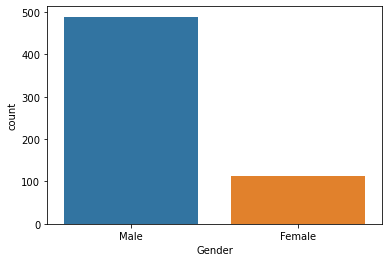

In [21]:
sb.countplot(x='Gender',data=dataset)

In [22]:
dataset.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

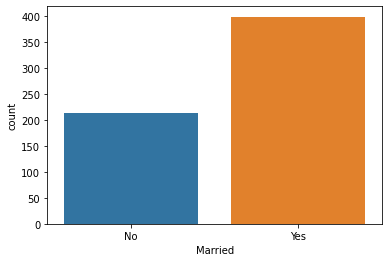

In [23]:
sb.countplot(x='Married',data=dataset)

In [24]:
dataset.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

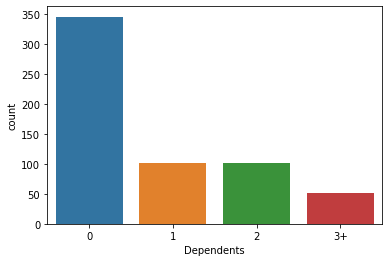

In [25]:
sb.countplot(x='Dependents',data=dataset)

In [26]:
dataset.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

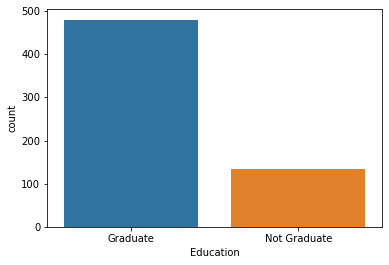

In [27]:
sb.countplot(x='Education',data=dataset)

In [28]:
dataset.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

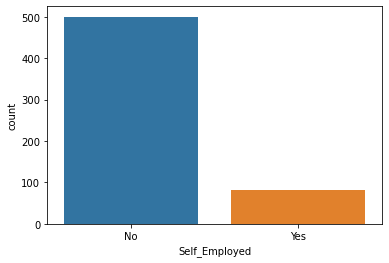

In [29]:
sb.countplot(x='Self_Employed',data=dataset)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

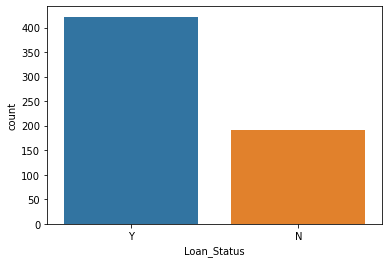

In [30]:
sb.countplot(x='Loan_Status',data=dataset)

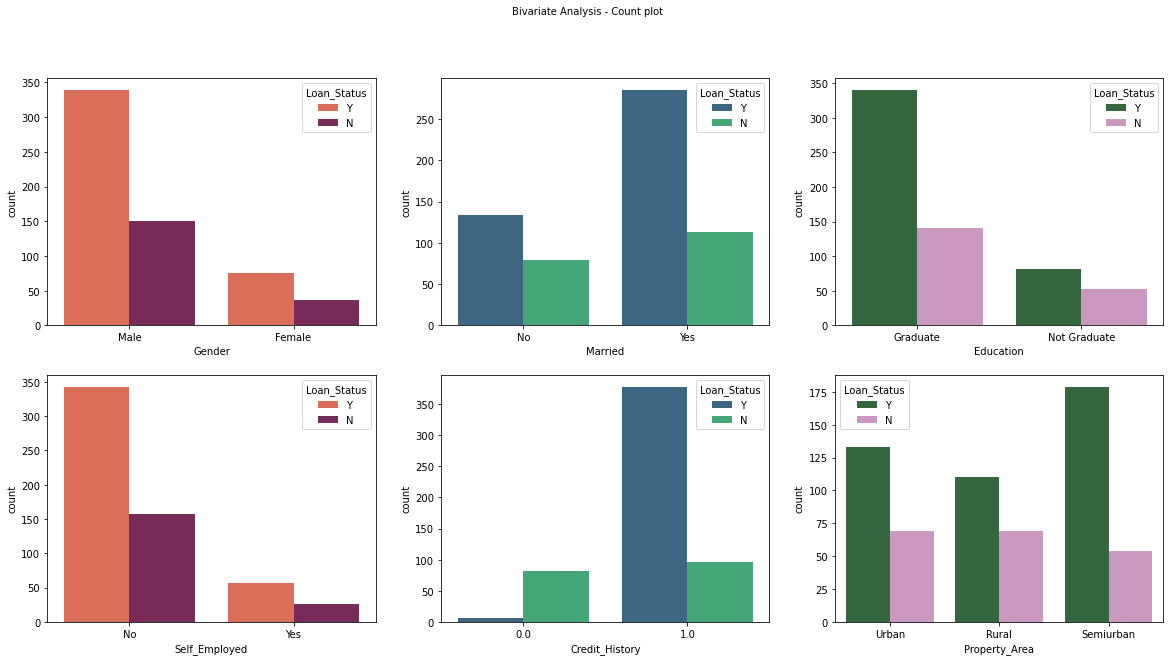

In [31]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

mtp.figure(figsize=(20,10))

mtp.subplot(231)
sb.countplot(dataset['Gender'],hue=dataset['Loan_Status'],palette='rocket_r')

mtp.subplot(232)
sb.countplot(dataset['Married'],hue=dataset['Loan_Status'],palette='viridis')

mtp.subplot(233)
sb.countplot(dataset['Education'],hue=dataset['Loan_Status'],palette='cubehelix')

mtp.subplot(234)
sb.countplot(dataset['Self_Employed'],hue=dataset['Loan_Status'],palette='rocket_r')

mtp.subplot(235)
sb.countplot(dataset['Credit_History'],hue=dataset['Loan_Status'],palette='viridis')

mtp.subplot(236)
sb.countplot(dataset['Property_Area'],hue=dataset['Loan_Status'],palette='cubehelix')

mtp.suptitle('Bivariate Analysis - Count plot',fontsize = 10)
mtp.show()

CHECHING FOR NULL VALUES

In [32]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
dataset_1=dataset.dropna()  #removing null values
dataset_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
dataset_2=dataset_1.drop(['Loan_ID'],axis=1) # drop used to removed column if axis=0 or row if axis=1
dataset_2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [35]:
dataset_3=pd.get_dummies(dataset_2) # dividing categorial data into more sutibale form for prediction
dataset_3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [36]:
# Drop columns
dataset_4 = dataset_3.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
dataset_4.rename(columns={'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}, inplace=True)

In [37]:
dataset_4.head(50)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,0,1,0,1,1,0,0,1,1
6,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
7,3036,2504.0,158.0,360.0,0.0,1,1,0,0,0,1,1,0,0,1,0,0
8,4006,1526.0,168.0,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
9,12841,10968.0,349.0,360.0,1.0,1,1,0,1,0,0,1,0,0,1,0,0
10,3200,700.0,70.0,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1


In [38]:
x = dataset_4.drop(["Loan_Status"], axis=1)
y = dataset_4["Loan_Status"]

In [39]:
from imblearn.over_sampling import SMOTE # used to solve imbalance problem in the dataset
X, Y = SMOTE().fit_resample(x, y)

BEFORE SAMPLING (480,)


Text(0.5, 0, 'Total')

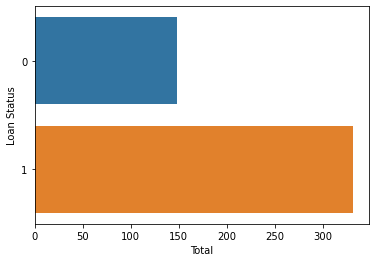

In [40]:
print('BEFORE SAMPLING {}'.format(y.shape))
sb.countplot(y=y,data=dataset_4)
mtp.ylabel('Loan Status')
mtp.xlabel('Total')

AFTER SAMPLING (664,)


Text(0.5, 0, 'Total')

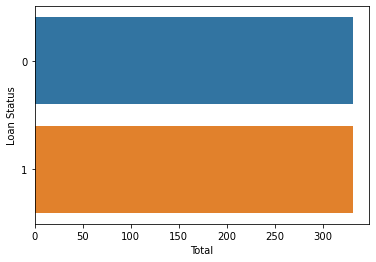

In [41]:
print('AFTER SAMPLING {}'.format(Y.shape))
sb.countplot(y=Y,data=dataset_4)
mtp.ylabel('Loan Status')
mtp.xlabel('Total')

splitting dataset for training(80%) and testing(20%)

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
import warnings 
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

SVC

In [44]:
svc=SVC(max_iter=500)
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('confusion matrix:\n',confusion_matrix(Y_test,Y_pred))
print('\n Classification report:\n',classification_report(Y_test,Y_pred))
from sklearn.metrics import accuracy_score
auSV=accuracy_score(Y_test,Y_pred)
print('Accuracy Score: {:2f}%'.format(auSV*100))

confusion matrix:
 [[ 7 61]
 [ 4 61]]

 Classification report:
               precision    recall  f1-score   support

           0       0.64      0.10      0.18        68
           1       0.50      0.94      0.65        65

    accuracy                           0.51       133
   macro avg       0.57      0.52      0.41       133
weighted avg       0.57      0.51      0.41       133

Accuracy Score: 51.127820%


DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(Y_test,Y_pred))
print('Classification report')
print(classification_report(Y_test,Y_pred))
acDT=accuracy_score(Y_test,Y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(acDT*100))

Confusion matrix
[[57 11]
 [19 46]]
Classification report
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        68
           1       0.81      0.71      0.75        65

    accuracy                           0.77       133
   macro avg       0.78      0.77      0.77       133
weighted avg       0.78      0.77      0.77       133

Decision Tree Accuracy: 77.44%


LogisticRegression

In [46]:
lr=LogisticRegression(max_iter=500)
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
print('Confusion matrix')
print()
print(confusion_matrix(Y_test,Y_pred))
print()
print('Classification Report')
print(classification_report(Y_test,Y_pred))
print()
from sklearn.metrics import accuracy_score
acLR=accuracy_score(Y_test,Y_pred)
print('accuracy_score:{:.2f}%'.format(acLR*100))

Confusion matrix

[[55 13]
 [ 8 57]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        68
           1       0.81      0.88      0.84        65

    accuracy                           0.84       133
   macro avg       0.84      0.84      0.84       133
weighted avg       0.84      0.84      0.84       133


accuracy_score:84.21%


In [47]:
compare = pd.DataFrame({'Model': ['Logistic Regression','SVM','Decision Tree'], 
                        'Accuracy': [acLR*100,auSV*100,acDT*100]})
compare

,Model,Accuracy
0,Logistic Regression,84.210526
1,SVM,51.127820
2,Decision Tree,77.443609


In [48]:
# arr=np.array([3366	,2200.0	,135.0	,360.0	,1.0	,1	,1	,1	,0	,0	,0	,1	,0	,1	,0	,0])
# arr
# #6000	0.0	205.0	240.0	1.0	1	1	0	0	1	0	1	1	0	1	0	0
lr_1= lr.fit(X_train,Y_train)

convert model into a byte stream and dump it into a .pkl file

In [49]:
# Y_pred=lr.predict(arr.reshape(1, -1))
# if Y_pred == 0:
#     ans="YOU ARE NOT ELIGIBLE FOR LOAN"
# else :
#     ans="YOU ARE ELIGIBLE FOR LOAN"
# print(ans)


pickle.dump(lr_1,open('model1.pkl','wb'))